<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab03_Algoritmia_y_graficacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 03


## 1.0 Mapa logístico
Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logístico

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.

Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib.


> ### Problema:
a. Programar la ecuación para el mapa logístico, y  realizar una grafica del valor de xn como funcion de n.

b. Realizar pruebas para un $x_0=0.5$, con valores de r

```
  r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
  numpoints = 100, # Numero sugerido de iteraciones
  x0 = 0.5
```

Organizar las gráficas [multiples plot](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)



c. Construye una rutina llamada logist_map en que entrada el valor de r, la condiciones inicial xi y el número de puntos determine la evolución en el punto N.  Prueba implementado las siguientes lineas.

```
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)

for i in range(0, Np):
  xini = np.random.random()
  x_i = logist_map(r = r[i], xi = xini, N = 1000)
  xf[i] = x_i
```


d. Realiza un gráfico de:
```
  plt.plot((r-1/r), xf,  ".", markersize = 0.5)
```


e. Encontrar dos formas adicionales de expresar $f(x)$, para estos valores funcionales determinar las mismas gráficas del numeral 3 para cada uno de las formas de escribir la expresión. En este caso se espera que los resultados varien. ¿A que se debe esto?. Consulta algunas fuentes para responder a la pregunta.


Ref: https://www.youtube.com/watch?v=EOvLhZPevm0&t=104s


In [5]:
import numpy as np
import matplotlib.pyplot as plt

ro = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
numpoints = 100, # Numero sugerido de iteraciones
x0 = 0.5

## a
def x_n(r,xo,N): ## esta función nos permite calcular un array con todos los datos de la recursión, ideal para graficar
  variable = np.zeros((N,),dtype = float)
  variable[0] = xo
  for i in range(1,N):
    variable[i] = r*variable[i-1] * (1 - variable[i-1])
  return variable

def logist_map(r,xo,N):  ## esta me devuelve el valor asociado de la recursión para la posición N.
  variable = np.zeros((N,),dtype = float)
  variable[0] = xo
  for i in range(1,N):
    variable[i] = r*variable[i-1] * (1 - variable[i-1])
  return variable[-1]

color = ["red","blue","orange","green","red","blue"]

def grafica(variable): ## está función me realiza la grafica asociada a un array
  x = np.arange(0,len(variable),1)
  plt.figure(figsize = (6,4))
  plt.plot(x,variable,color = "red")
  plt.title("Evolución en el tiempo")
  plt.xlabel("N")
  plt.ylabel(r"$x_{n+1}$")
  plt.show()

## esta función me permité realizar subplots a partir del tamaño de los valores de r como varian.
## la cual se debe emplear para condiciones iniciales de la grafica.

def grafica_subplots(ro,xo,N):
  variable = 0
  plt.figure(figsize = (16,14))
  fig,axes = plt.subplots(len(ro)//2-1,len(ro)//2, figsize = (10,8),sharex=True,sharey=True) ## esto me crea una figura para un numpy array de la mitad de la cantidad de valores de r
  plt.suptitle("Evolución en el tiempo",fontsize = 16) # el titulo para todos los subplots
  for i in range(len(ro)):## este ciclo for se usa para acceder a cada valor de r y usarlo para cada grafica
    valor = x_n(ro[i],xo,N) # este sería el valor del eje y para cada uno de los distintos r
    x = np.arange(0,len(valor),1)
    if i == 3: ## esto es para que pasemos a la siguiente fila
      variable=+1
    if i >= 3:  ## este condicional es para que podamos organizar el tamaño del ciclo con la posición de cada una de las figuras
      axes[variable,i-3].plot(x,valor,f"tab:{color[i]}",label = fr"$X_{{n+1}} = {ro[i]} \cdot ( X_{{n}} - 1 )$") ## la leyenda y que queremos graficar en cada figura
      axes[variable,i-3].set_xlabel("Cantidad de datos") ## nombre en el eje x
      axes[variable,i-3].set_ylabel(r"$X_{n+1}$") ## nombre en el eje y
      axes[variable,i-3].legend(fontsize = "small")
    else: ## este es para la primera fila.
      axes[variable,i].plot(x,valor,f"tab:{color[i]}",label = fr"$X_{{n+1}} = {ro[i]} \cdot ( X_{{n}} - 1 )$")
      axes[variable,i].set_xlabel("Cantidad de datos")
      axes[variable,i].set_ylabel(r"$X_{n+1}$")
      axes[variable,i].legend(fontsize = "small")
  plt.tight_layout() ## esto ajusta el tamaño de los titulos de cada eje

  for ax in axes.flat:
    ax.label_outer()
  #fig.supxlabel("Cantidad de datos")
  #fig.supylabel(r"$X_{n+1}$")









<Figure size 1600x1400 with 0 Axes>

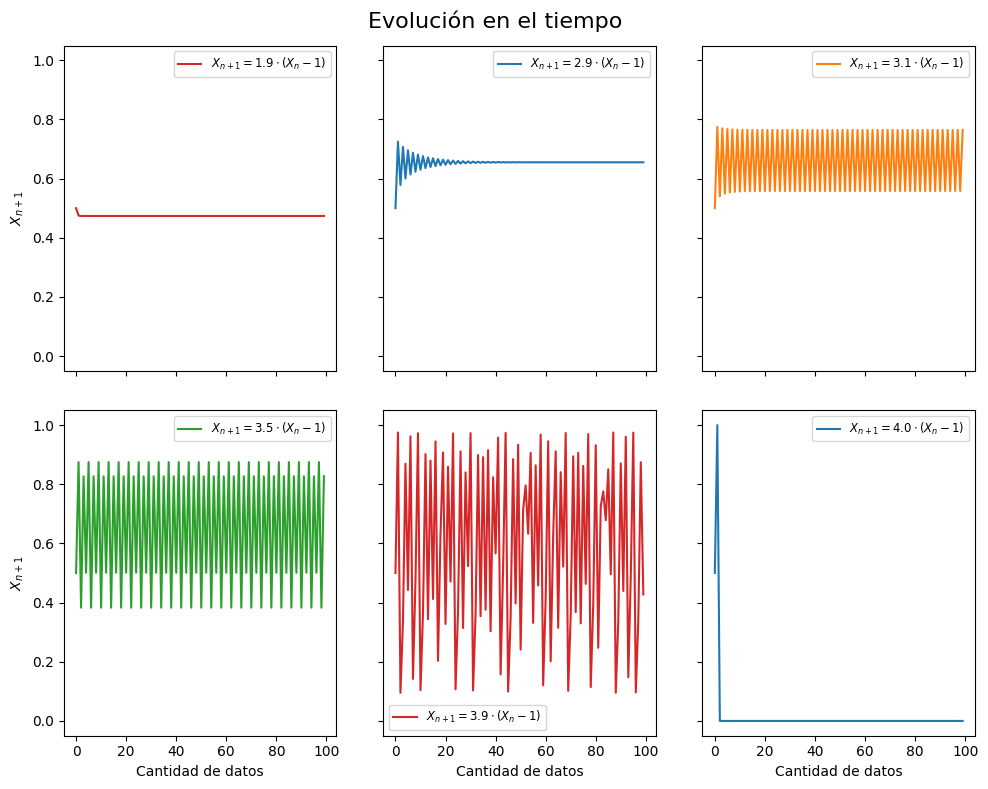

In [6]:
## caso 1, para r = 1.9
##
N = 100
xo = 0.5
ro = list(np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0]))
grafica2 = grafica_subplots(ro,xo,N)
grafica2

Text(0.5, 1.0, 'Crecimiento dado para el valor 100')

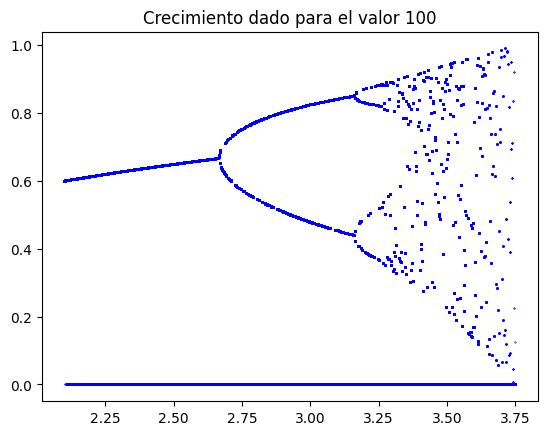

In [7]:
## c
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)
## d
for i in range(0, Np):
  xini = np.random.random()
  x_i = logist_map(r = r[i], xo = xini, N = 1000)
  xf[i] = x_i
  plt.plot((r-1/r), xf,  ".", markersize = 0.5,color = "blue")
plt.title(f"Crecimiento dado para el valor {N}")


## Vamos a emplear dos expresiónes distintas para la anterior recursión.

In [8]:

## mismas condiciones iniciales anteriores función distinta.

xo = 0.5
r = 4
N = 100

def x_n_distinto1(r,xo,N): ## esta función nos permite calcular un array con todos los datos de la recursión, ideal para graficar
  variable = np.zeros((N,),dtype = float)
  variable[0] = xo
  for i in range(1,N):
    variable[i] = (r*variable[i-1])**(3) - r * (np.sin(variable[i-1]))
  return variable
def logist_map1(r,xo,N):
  variable = np.zeros((N,),dtype = float)
  variable[0] = xo
  for i in range(1,N):
    variable[i] = (r*variable[i-1])**(3) - r * (np.sin(variable[i-1]))
  return variable[-1]

def grafica_subplots1(ro,xo,N):
  variable = 0
  plt.figure(figsize = (16,14))
  fig,axes = plt.subplots(len(ro)//2-1,len(ro)//2, figsize = (10,8),sharex=True,sharey=True) ## esto me crea una figura para un numpy array de la mitad de la cantidad de valores de r
  plt.suptitle("Evolución en el tiempo",fontsize = 16) # el titulo para todos los subplots
  for i in range(len(ro)):## este ciclo for se usa para acceder a cada valor de r y usarlo para cada grafica
    valor = x_n_distinto1(ro[i],xo,N) # este sería el valor del eje y para cada uno de los distintos r
    x = np.arange(0,len(valor),1)
    if i == 3: ## esto es para que pasemos a la siguiente fila
      variable=+1
    if i >= 3:  ## este condicional es para que podamos organizar el tamaño del ciclo con la posición de cada una de las figuras
      axes[variable,i-3].plot(x,valor,f"tab:{color[i]}",label = fr"$({ro[i]} \cdot X_{{n}})^{3} - {ro[i]}\cdot sin(X_{{n}})$") ## la leyenda y que queremos graficar en cada figura
      axes[variable,i-3].set_xlabel("Cantidad de datos") ## nombre en el eje x
      axes[variable,i-3].set_ylabel(r"$X_{n+1}$") ## nombre en el eje y
      axes[variable,i-3].legend(fontsize = "small")
    else: ## este es para la primera fila.
      axes[variable,i].plot(x,valor,f"tab:{color[i]}",label = fr"$({ro[i]} \cdot X_{{n}})^{3} - {ro[i]}\cdot sin(X_{{n}})$")
      axes[variable,i].set_xlabel("Cantidad de datos")
      axes[variable,i].set_ylabel(r"$X_{n+1}$")
      axes[variable,i].legend(fontsize = "small")
  plt.tight_layout() ## esto ajusta el tamaño de los titulos de cada eje

  for ax in axes.flat:
    ax.label_outer()



<ipython-input-8-c588ca73048a>:11: RuntimeWarning: overflow encountered in double_scalars
  variable[i] = (r*variable[i-1])**(3) - r * (np.sin(variable[i-1]))
<ipython-input-8-c588ca73048a>:11: RuntimeWarning: invalid value encountered in sin
  variable[i] = (r*variable[i-1])**(3) - r * (np.sin(variable[i-1]))


<Figure size 1600x1400 with 0 Axes>

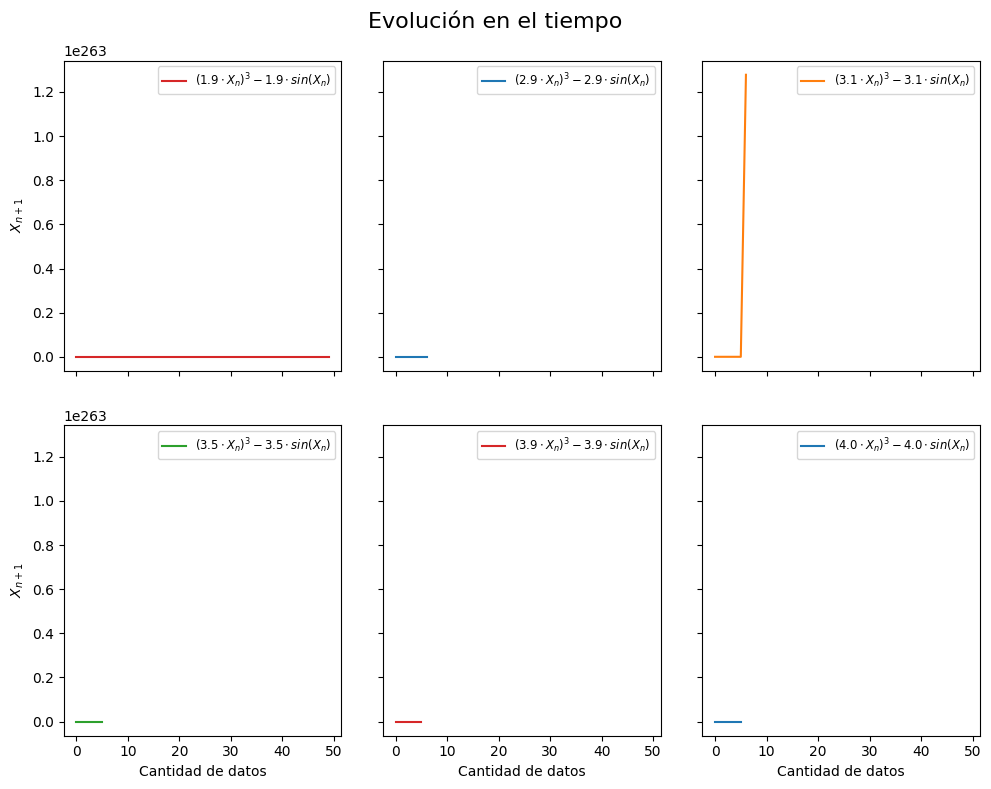

In [9]:
N = 50
xo = 0.5
ro = list(np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0]))
grafica3 = grafica_subplots1(ro,xo,N)
grafica3

<ipython-input-8-c588ca73048a>:17: RuntimeWarning: overflow encountered in double_scalars
  variable[i] = (r*variable[i-1])**(3) - r * (np.sin(variable[i-1]))
<ipython-input-8-c588ca73048a>:17: RuntimeWarning: invalid value encountered in sin
  variable[i] = (r*variable[i-1])**(3) - r * (np.sin(variable[i-1]))


Text(0.5, 1.0, 'Crecimiento dado para el valor 50')

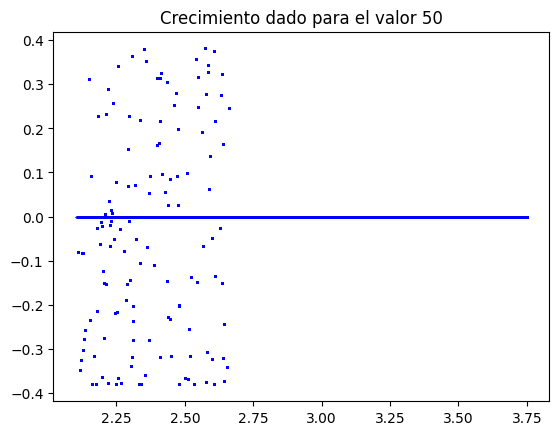

In [10]:
## c
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)
## d
for i in range(0, Np):
  xini = np.random.random()
  x_i = logist_map1(r = r[i], xo = xini, N = 1000)
  xf[i] = x_i
  plt.plot((r-1/r), xf,  ".", markersize = 0.5,color = "blue")
plt.title(f"Crecimiento dado para el valor {N}")

In [11]:
xo = 0.5
r = 4
N = 100



def x_n_distinto2(r,xo,N): ## esta función nos permite calcular un array con todos los datos de la recursión, ideal para graficar
  variable = np.zeros((N,),dtype = float)
  variable[0] = xo
  for i in range(1,N):
    variable[i] = ((( np.sqrt(r*variable[i-1]) - np.sqrt(r * (variable[i-1])**2))*(np.sqrt(r * (variable[i-1])) + np.sqrt(r * (variable[i-1])**2) )))**(5)
  return variable

def logist_map2(r,xo,N):
  variable = np.zeros((N,),dtype = float)
  variable[0] = xo
  for i in range(1,N):
    variable[i] = ((( np.sqrt(r*variable[i-1]) - np.sqrt(r * (variable[i-1])**2))*(np.sqrt(r * (variable[i-1])) + np.sqrt(r * (variable[i-1])**2) )))**(5)
  return variable[-1]


def grafica_subplots2(ro,xo,N):
  variable = 0
  plt.figure(figsize = (16,14))
  fig,axes = plt.subplots(len(ro)//2-1,len(ro)//2, figsize = (10,8),sharex=True,sharey=True) ## esto me crea una figura para un numpy array de la mitad de la cantidad de valores de r
  plt.suptitle("Evolución en el tiempo",fontsize = 16) # el titulo para todos los subplots
  for i in range(len(ro)):## este ciclo for se usa para acceder a cada valor de r y usarlo para cada grafica
    valor = x_n_distinto2(ro[i],xo,N) # este sería el valor del eje y para cada uno de los distintos r
    x = np.arange(0,len(valor),1)
    if i == 3: ## esto es para que pasemos a la siguiente fila
      variable=+1
    if i >= 3:  ## este condicional es para que podamos organizar el tamaño del ciclo con la posición de cada una de las figuras
      axes[variable,i-3].plot(x,valor,f"tab:{color[i]}",label = fr"$ [( \sqrt{{ {ro[i]} \cdot X_{{n}} }} - \sqrt{{ {ro[i]} \cdot X_{{n}}^{2}   }} ) \cdot ( \sqrt{{ {ro[i]}\cdot X_{{n}}^{2} }} + \sqrt{{ {ro[i]} \cdot X_{{n}}^{2} }})]^{5} $") ## la leyenda y que queremos graficar en cada figura
      axes[variable,i-3].set_xlabel("Cantidad de datos") ## nombre en el eje x
      axes[variable,i-3].set_ylabel(r"$X_{n+1}$") ## nombre en el eje y
      axes[variable,i-3].legend(fontsize = "xx-small")
    else: ## este es para la primera fila.
      axes[variable,i].plot(x,valor,f"tab:{color[i]}",label = fr"$ [( \sqrt{{ {ro[i]} \cdot X_{{n}} }} - \sqrt{{ {ro[i]} \cdot X_{{n}}^{2}   }} ) \cdot ( \sqrt{{ {ro[i]}\cdot X_{{n}}^{2} }} + \sqrt{{ {ro[i]} \cdot X_{{n}}^{2} }})]^{5} $")
      axes[variable,i].set_xlabel("Cantidad de datos")
      axes[variable,i].set_ylabel(r"$X_{n+1}$")
      axes[variable,i].legend(fontsize = "xx-small")
  plt.tight_layout() ## esto ajusta el tamaño de los titulos de cada eje

  for ax in axes.flat:
    ax.label_outer()



<ipython-input-11-5af39de8f821>:11: RuntimeWarning: invalid value encountered in sqrt
  variable[i] = ((( np.sqrt(r*variable[i-1]) - np.sqrt(r * (variable[i-1])**2))*(np.sqrt(r * (variable[i-1])) + np.sqrt(r * (variable[i-1])**2) )))**(5)


<Figure size 1600x1400 with 0 Axes>

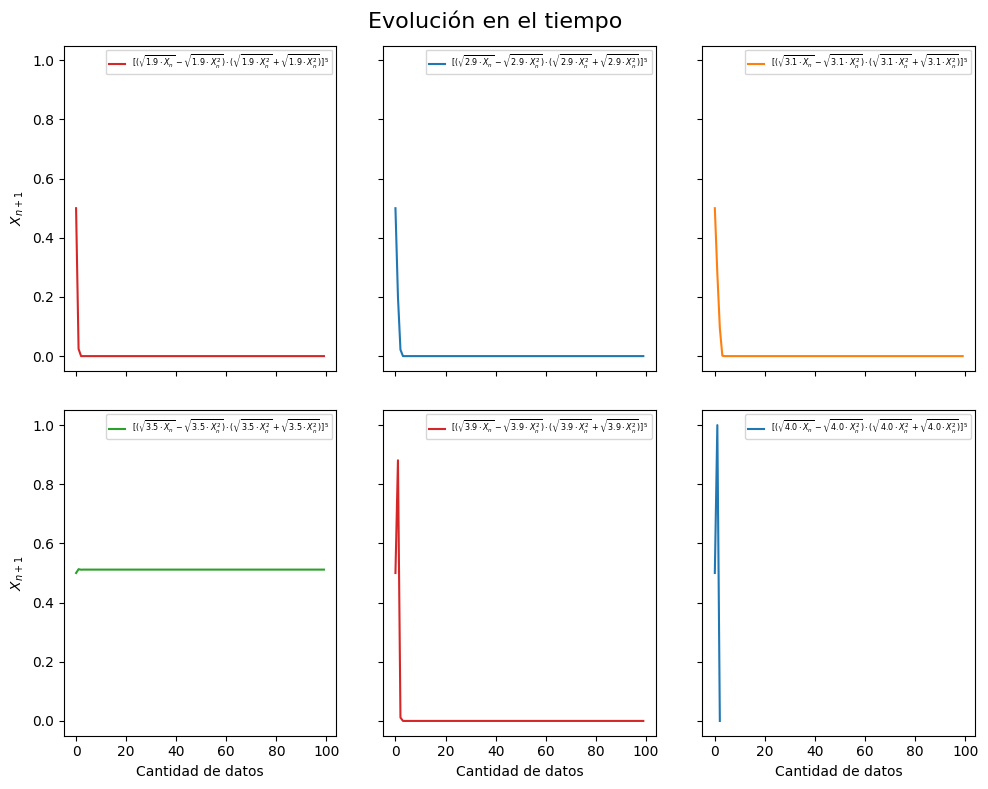

In [12]:

N = 100
xo = 0.5
ro = list(np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0]))
grafica4 = grafica_subplots2(ro,xo,N)
grafica4

Text(0.5, 1.0, 'Crecimiento dado para el valor 1000')

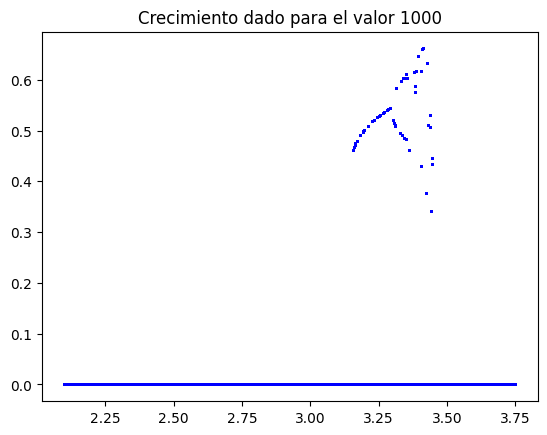

In [13]:
## c
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)
## d
for i in range(0, Np):
  xini = np.random.random()
  x_i = logist_map2(r = r[i], xo = xini, N = 1000)
  xf[i] = x_i
  plt.plot((r-1/r), xf,  ".", markersize = 0.5,color = "blue")
plt.title(f"Crecimiento dado para el valor {Np}")

## 2. Mapa de henon
El mapa de Hénon es un sistema dinámico discreto en el tiempo que se define por las siguientes ecuaciones:

$$x_{n+1} = 1 - ax_n^2 + y_n$$
$$y_{n+1} = bx_n$$

Donde $x_n$ y $y_n$ son las coordenadas de un punto en el plano, y $a$ y $b$ son dos parámetros que controlan el comportamiento del mapa. El mapa de Hénon es uno de los ejemplos más estudiados de sistemas dinámicos que muestran comportamiento caótico, es decir, una gran sensibilidad a las condiciones iniciales y una estructura fractal.

El mapa de Hénon fue introducido por Michel Hénon como un modelo simplificado de la sección de Poincaré del modelo de Lorenz, que es otro sistema dinámico caótico que describe la convección atmosférica². Para los valores clásicos del mapa de Hénon, que son $a = 1.4$ y $b = 0.3$, un punto inicial del plano se acercará a un conjunto de puntos conocido como el atractor extraño de Hénon, o divergirá al infinito. El atractor de Hénon es una curva suave en una dirección y un conjunto de Cantor en otra.

Su tarea será:
1. Construir una gráfica de xn como función de N
2. Construir una gráfica de yn como función de N
3. Construir una gráfica de xn, yn.
4. Para b=0.3, construir una curva de xn como función de a, con a entre 0, 1


Reto, con tu codigo, reproducir los fractales mostrados en esta página https://blbadger.github.io/henon-map.html

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Condiciones iniciales
a = 1.4
b = 0.3
xo = 0
yo = 0 ## punto desde donde parte el mapa.
N = 10


## Esta función me permite calcular un numpy array con los N elementos de la sucesión Xn_1


def xnhenon(a,b,xo,yo,N):
  vaciax = np.empty((N,),dtype = float) ## Esto me crea un array lleno de zeros de dimensión 1, y tamaño N.
  vaciax[0] = xo
  vaciay = np.empty((N,),dtype = float)
  vaciay[0] = yo
  for i in range(1,N):
    vaciax[i] = 1 - a* (vaciax[i-1] ** 2) + vaciay[i-1]
    vaciay[i] = b * vaciax[i-1]
  return vaciax,vaciay



## Esta función me grafica uno valores definidos para un array

def graficahenonx(variable,a,b): ## está función me realiza la grafica asociada a un array
  x = np.arange(0,len(variable),1)
  plt.figure(figsize = (6,4))
  plt.plot(x,variable,color = "blue", label = fr"$ X_{{n+1}} = 1 - {a} \cdot X_{{n}}^{2} + y_{{n}}   $")
  plt.title("Mapa de henon para los valores de x")
  plt.xlabel("Cantidad de iteraciones")
  plt.ylabel(r"$x_{n+1}$")
  plt.legend(fontsize = "small")
  plt.show()


def graficahenony(variable,a,b): ## está función me realiza la grafica asociada a un array
  x = np.arange(0,len(variable),1)
  plt.figure(figsize = (6,4))
  plt.plot(x,variable,color = "blue", label = fr"$ X_{{n+1}} = 1 - {a} \cdot X_{{n}}^{2} + y_{{n}}   $")
  plt.title("Mapa de henon para los valores de y")
  plt.xlabel("Cantidad de iteraciones")
  plt.ylabel(r"$x_{n+1}$")
  plt.legend(fontsize = "small")
  plt.show()

def graficahenonx_y(lista1,lista2,a,b): ## está función me realiza la grafica asociada a un array
  plt.figure()
  plt.plot(lista1,lista2,"^",color = "black", alpha = 0.8,markersize = 0.3)
  plt.show()
  plt.close()


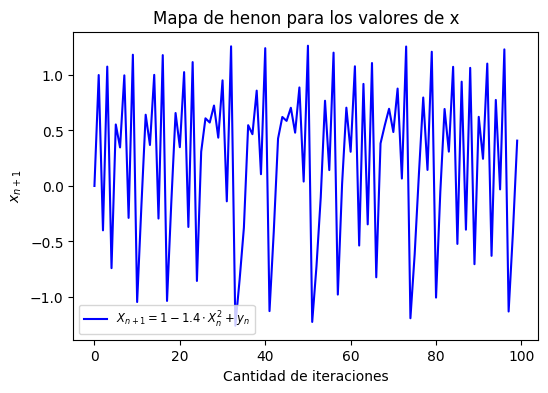

In [15]:
## 1. Grafica de Xn en función de N.

a = 1.4
b = 0.3
xo = 0
yo = 0 ## punto desde donde parte el mapa.
N = 100

eje_y1 = xnhenon(a,b,xo,yo,N)
grafica_henonxn1 = graficahenonx(eje_y1[0],a,b)
grafica_henonxn1

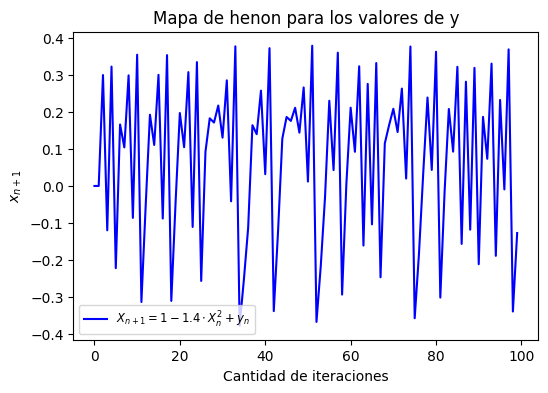

In [16]:
## 2. Grafica de Yn en función de N.
a = 1.4
b = 0.3
xo = 0
yo = 0 ## punto desde donde parte el mapa.
N = 100

eje_y2 = xnhenon(a,b,xo,yo,N)
grafica_henon2 = graficahenony(eje_y2[1],a,b)
grafica_henon2

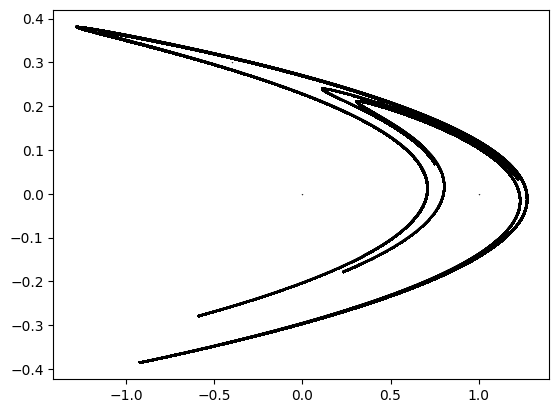

In [17]:
## 3. Grafica de X y Y.
a = 1.4
b = 0.3
xo = 0
yo = 0 ## punto desde donde parte el mapa.
N = 1000000

eje_y3 = xnhenon(a,b,xo,yo,N)
grafica_henon3 = graficahenonx_y(eje_y3[0],eje_y3[1],a,b)
grafica_henon3

<Figure size 640x480 with 0 Axes>

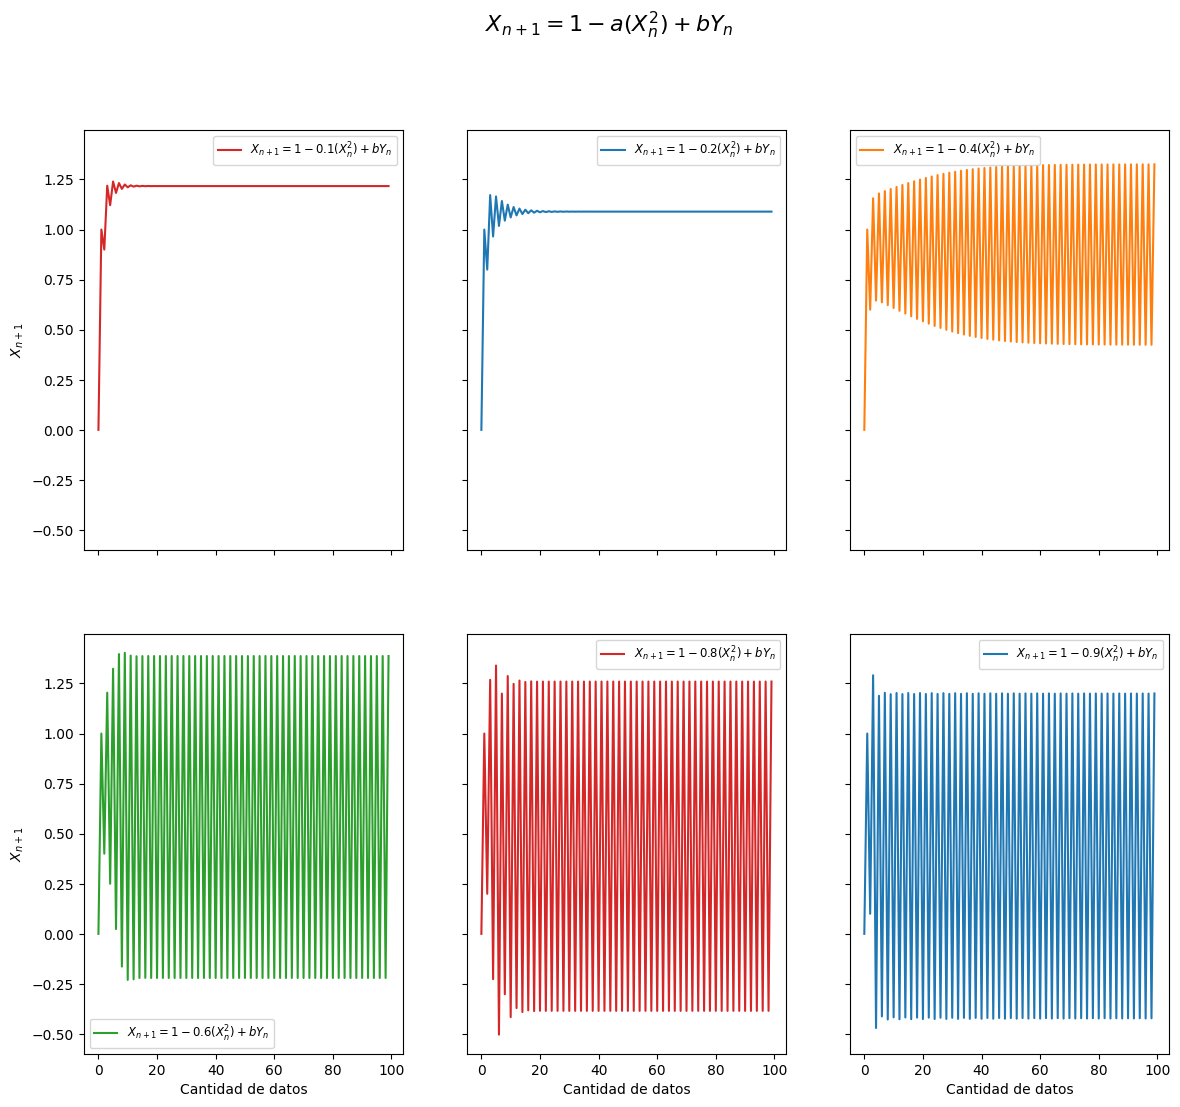

In [18]:
## 4. En este puntos vamos a usar los subplots para hacer varias curvas de Xn, para diversos valores de a, y unas mil iteraciones en cada caso
a = [0.1,0.2,0.4,0.6,0.8,0.9]
b = 0.3
xo = 0
yo = 0
N = 100
color = ["red","blue","orange","green","red","blue"]
def grafica_subplotsa(a,b,xo,yo,N):
  variable = 0
  plt.figure()
  fig,axes = plt.subplots(len(a)//2-1,len(a)//2, figsize = (14,12),sharex=True,sharey=True) ## esto me crea una figura para un numpy array de la mitad de la cantidad de valores de r
  plt.suptitle(r"$X_{n+1} = 1 -a(X_{n}^{2}) + bY_{n}$",fontsize = 16) # el titulo para todos los subplots
  for i in range(len(a)):## este ciclo for se usa para acceder a cada valor de r y usarlo para cada grafica
    valor = xnhenon(a[i],b,xo,yo,N) # este sería el valor del eje y para cada uno de los distintos r
    x = np.arange(0,len(valor[0]),1)
    if i == 3: ## esto es para que pasemos a la siguiente fila
      variable=+1
    if i >= 3:  ## este condicional es para que podamos organizar el tamaño del ciclo con la posición de cada una de las figuras
      axes[variable,i-3].plot(x,valor[0],f"tab:{color[i]}",label = fr"$X_{{n+1}} = 1 -{a[i]}(X_{{n}}^{2}) + bY_{{n}}$") ## la leyenda y que queremos graficar en cada figura
      axes[variable,i-3].set_xlabel("Cantidad de datos") ## nombre en el eje x
      axes[variable,i-3].set_ylabel(r"$X_{n+1}$") ## nombre en el eje y
      axes[variable,i-3].legend(fontsize = "small")
    else: ## este es para la primera fila.
      axes[variable,i].plot(x,valor[0],f"tab:{color[i]}",label = fr"$ X_{{n+1}} = 1 -{a[i]}(X_{{n}}^{2}) + bY_{{n}}$")
      axes[variable,i].set_xlabel("Cantidad de datos")
      axes[variable,i].set_ylabel(r"$X_{n+1}$")
      axes[variable,i].legend(fontsize = "small")
  for ax in axes.flat:
    ax.label_outer()


grafica_subplotsa(a,b,xo,yo,N)



## 3.0  Gradiente descendente
El algoritmo de gradiente descendente permite encontrar el mínimo de funciones en espacios multidimensionales proponiendo puntos en la dirección en la que el gradiente desciende. Para el caso de una dimensión, podemos encontrar el mínimo realizando iteraciones y multiplicando su derivada en cada nuevo punto por una constante $\alpha$

\begin{equation}
x_{i+1}=x_i - \alpha \frac{\mathrm{d}f}{\mathrm{d}x}(x_i)
\end{equation}


Ejemplo:

Sea $f(\omega) = (\omega-1)^2$ , con $\omega \in \mathbb{R} $. El minimo de esta función esta determinado por
\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}\omega} = 0
\end{equation}

\begin{equation}
\omega = 1
\end{equation}


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
1. Proponer un número aleatorios inicial $\omega_i$
2. Para descender al mínimo de la función, encontremos un  valor para el cual
la derivada de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

3. Evaluar $f(\omega_{i+1})$

4. Iterar hasta encontrar el minimo de la función


En el caso de la funcion propuesta, asumiendo un valor de $\alpha=1$, tenemos que:

1. Supongamos que $\omega_{0} = 2$, luego :
2. $\omega_{0+1} = 2 - 1 f'(\omega_{0}) =  = 0$
3. $f(0) = 1$
4. $\omega_{1+1} = 0 - 1 f'(\omega_{1}) = 0-1(2(0-1)) =  2$

El valor del $\omega$  despues de un par de iteraciones, no es el esperado, por que no minimiza la función, se debe proponer un tasa de aprendizaje  **$\alpha$** de tal forma que permita descender suavemente para encontrar el minimo.



**Su tarea será**:

1. Disenar un programa, en el que entrada la función y su derivada, definidas como funciones lambda de python, se determine el valor mínimo de esa función.
Prueba tu algoritmo para  la función $f(x) = x^2$

2. Realiza el grafico de la funcion y la derivada, especifica la leyenda de cada curva empleando el metodo legend() de matplotlib.
  

3. Analiza como se minimiza la función, gráficando de la funcion en cada punto a iterar,  como funcion del numero de iteraciones. Para dos valores diferentes de la constante alpha (prueba con $\alpha=0.1$, $\alpha=0.01$)


In [70]:
## 1. Funciones y derivadas.
import sympy as sp
f = lambda x : x**2
der_f = lambda x : 2*x
f2 = lambda x : 2 * x ** 2 +2 * x +2
der_f2 = lambda x : 2 * x + 2

## esta función permite calcular el minimo
def minimo(f,der_f):
  x = sp.Symbol("x")
  x_0 = 2   ## valor aleatorio
  alpha = np.linspace(0,2,100) ## una tasa de aprendizaje cualquiera
  xn_1 = list()
  xn_1.append(x_0)
  fn_1 = list()
  i = 0
  while der_f(xn_1[-1]) != 0:  # La logica radica en que debemos hallar cuando la derivada es cero, de lo contrario no puede ser un minimo
    valor = xn_1[-1] - alpha[i]* der_f(xn_1[-1]) ## esto emplea la recursión definida ## suponiendo que el minimo no es un punto singular.
    fn_1.append(f(xn_1[-1]))
    xn_1.append(valor)
    if len(xn_1) > 100:  # esto pone el limite a la cantidad de interaciónes con un alpha, antes de emplear otro
      xn_1 = list()
      xn_1.append(x_0)
      fn_1 = list()
      i+=1
  derivada_der_f = sp.diff(der_f(x), x) # esto emplea la derivada de la derivada, es decir la segunda derivada
  if derivada_der_f.subs(x, xn_1[-1]) > 0:  ## evalua para saber si es un minimo, con el criterio de la segunda derivada
    return xn_1[-1],f(xn_1[-1]) ## devuelve el minimo y su valor en la función
  else:
    msg = "El valor hallado es un máximo"
    return msg ## indica que es un maximo




def grafica_iteracion2(alpha,xo,f,der_f):
  xn_1 = list()
  xn_1.append(xo)
  fn_1 = list()
  fn_1.append(f(xo))
  while der_f(xn_1[-1]) != 0:
    valor = xn_1[-1] - alpha* der_f(xn_1[-1])
    xn_1.append(valor)
    fn_1.append(f(valor))
    if len(xn_1) > 100:
      break
  plt.figure(figsize = (8,6))
  plt.plot(xn_1,fn_1,"^",color = "black",label = "100 iteraciones")
  plt.title(r"$f(x) = x^{2}$", fontsize = 16)
  plt.legend(fontsize = "small")
  plt.grid(True, linestyle = "dashed")
  plt.ylabel(fr"$f(x_{{n+1}}) = f(x_{{n}} - {alpha} \cdot \frac{{df(x_{{n}})}}{{dx}})$")
  plt.xlabel(fr"$X_{{n+1}} = X_{{n}} - {alpha} \cdot \frac{{df }}{{dx }}  $")


def grafica_subplotsalpha(alpha,xo,f,der_f):
  variable = 0
  plt.figure()
  fig,axes = plt.subplots(len(a)//2-1,len(a)//2, figsize = (14,12),sharex=True,sharey=True) ## esto me crea una figura para un numpy array de la mitad de la cantidad de valores de r
  plt.suptitle(r"$f(x) = x^{2}$",fontsize = 16) # el titulo para todos los subplots
  for i in range(len(a)):## este ciclo for se usa para acceder a cada valor de r y usarlo para cada grafica
    xn_1 = list()
    xn_1.append(xo)
    fn_1 = list()
    fn_1.append(f(xo))
    while der_f(xn_1[-1]) != 0:
      valor = xn_1[-1] - alpha[i]* der_f(xn_1[-1])
      xn_1.append(valor)
      fn_1.append(f(valor))
      if len(xn_1) > 100:
        break
    if i == 3: ## esto es para que pasemos a la siguiente fila
      variable=+1
    if i >= 3:  ## este condicional es para que podamos organizar el tamaño del ciclo con la posición de cada una de las figuras
      axes[variable,i-3].plot(xn_1,fn_1,"^",color = color[i],label = "100 iteraciones") ## la leyenda y que queremos graficar en cada figura
      axes[variable,i-3].set_xlabel(fr"$X_{{n+1}} = X_{{n}} - {alpha[i]} \cdot \frac{{df }}{{dx }}  $") ## nombre en el eje x
      axes[variable,i-3].set_ylabel(fr"$f(x_{{n+1}}) = f(x_{{n}} - {alpha[i]} \cdot \frac{{df(x_{{n}})}}{{dx}})$") ## nombre en el eje y
      axes[variable,i-3].legend(fontsize = "small")
    else: ## este es para la primera fila.
      axes[variable,i].plot(xn_1,fn_1,"^",color = color[i],label = "100 iteraciones")
      axes[variable,i].set_xlabel(fr"$X_{{n+1}} = X_{{n}} - {alpha[i]} \cdot \frac{{df }}{{dx }}  $")
      axes[variable,i].set_ylabel(fr"$f(x_{{n+1}}) = f(x_{{n}} - {alpha[i]} \cdot \frac{{df(x_{{n}})}}{{dx}})$")
      axes[variable,i].legend(fontsize = "small")
  for ax in axes.flat:
    ax.label_outer()



<Figure size 640x480 with 0 Axes>

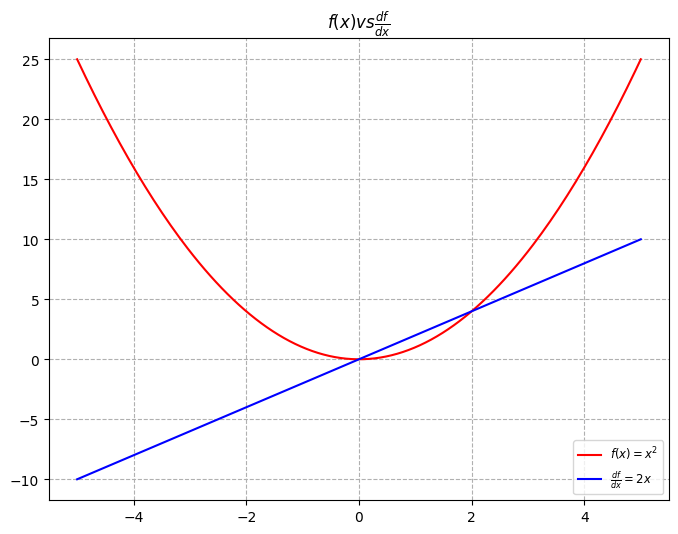

In [71]:
plt.figure()
fig,ax = plt.subplots(figsize= (8,6)) ## esto es para definir una unica grafica, pero con dos funciones, para poder editar cada una
## dominio de ambas
x = np.linspace(-5,5,200)
ax.plot(x,f(x), color = "red",label = r"$f(x) = x^{2}$")
ax.legend(fontsize = "small")
ax.plot(x,der_f(x), color = "blue",label = r"$\frac{df}{dx} = 2x$")
ax.legend(fontsize = "small")
plt.grid(True,linestyle = "dashed")
plt.title(r"$f(x) vs \frac{df}{dx} $")
plt.show()


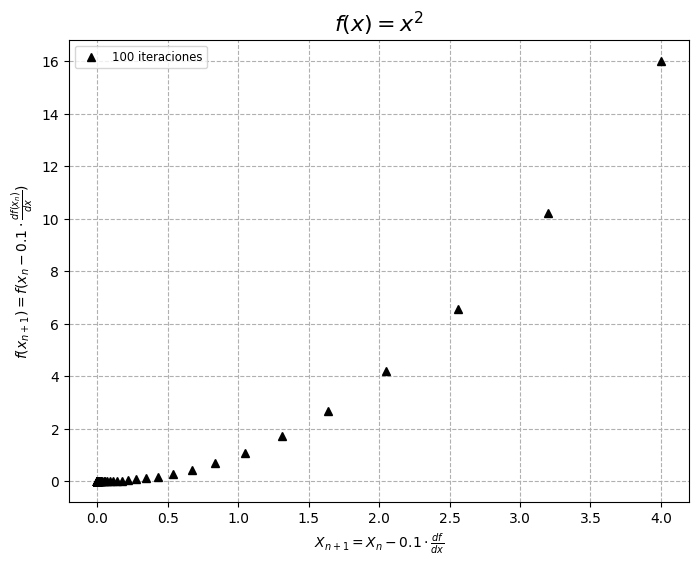

In [72]:
f = lambda x : x**2
der_f = lambda x : 2*x
alpha = 0.1
xo = 4
grafica_iteracion2(alpha,xo,f,der_f)


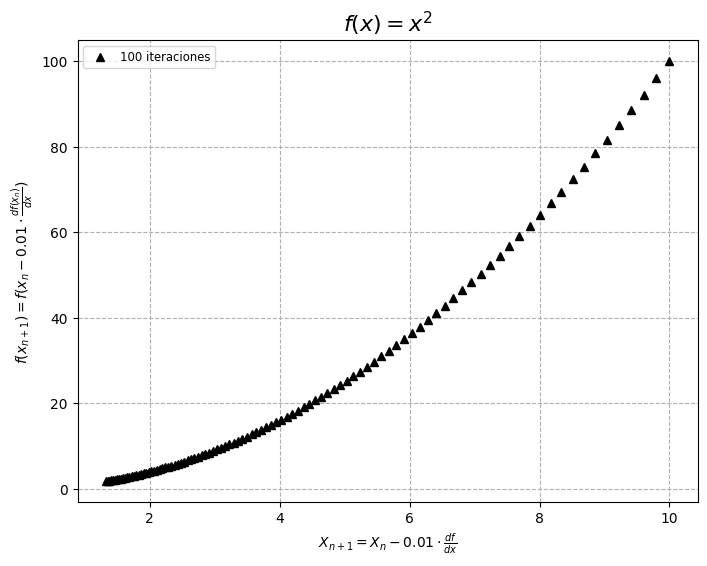

In [73]:
f = lambda x : x**2
der_f = lambda x : 2*x
alpha = 0.01
xo = 10
grafica_iteracion2(alpha,xo,f,der_f)


<Figure size 640x480 with 0 Axes>

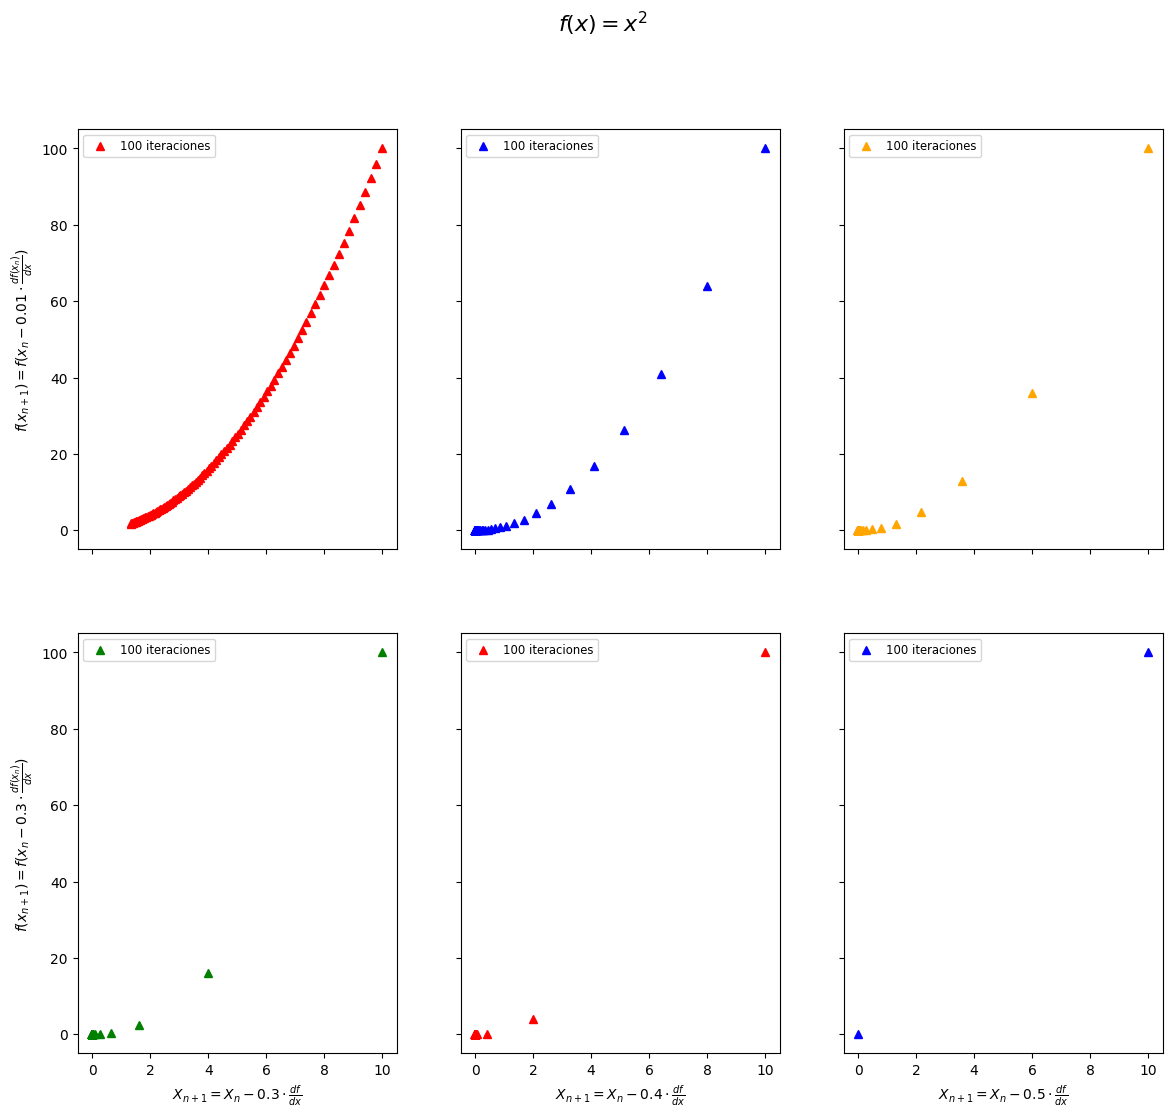

In [74]:
f = lambda x : x**2
der_f = lambda x : 2*x
xo = 10
alpha = [0.01,0.1,0.2,0.3,0.4,0.5]
grafica_subplotsalpha(alpha,xo,f,der_f)